In [2]:
import pandas as pd
import numpy as np

# Assuming the CSV file is downloaded and saved in the same directory as the notebook
file_path = "/Users/selinwork/Downloads/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
# Select categorical and numerical columns
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [4]:
cat.head()

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [5]:
# We have this amount of products and each category

cat["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
# With crosstab we can see the distribution of the best sellers in each category

crosstab1 = pd.crosstab(cat["category"], cat["isBestSeller"])
crosstab1 = crosstab1.sort_values(by=True, ascending=False)
crosstab1

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [7]:
import scipy.stats as stats

# We have a correlation between the category and the best seller status

chi2_test = _,chi2_pvalue,_,_ = stats.chi2_contingency(crosstab1)
float(chi2_pvalue) < 0.05  

True

In [8]:
from scipy.stats.contingency import association

association(crosstab1, method="cramer")

0.12228294397605641

In [9]:
# 0.12 is a low correlation.

<Axes: xlabel='category'>

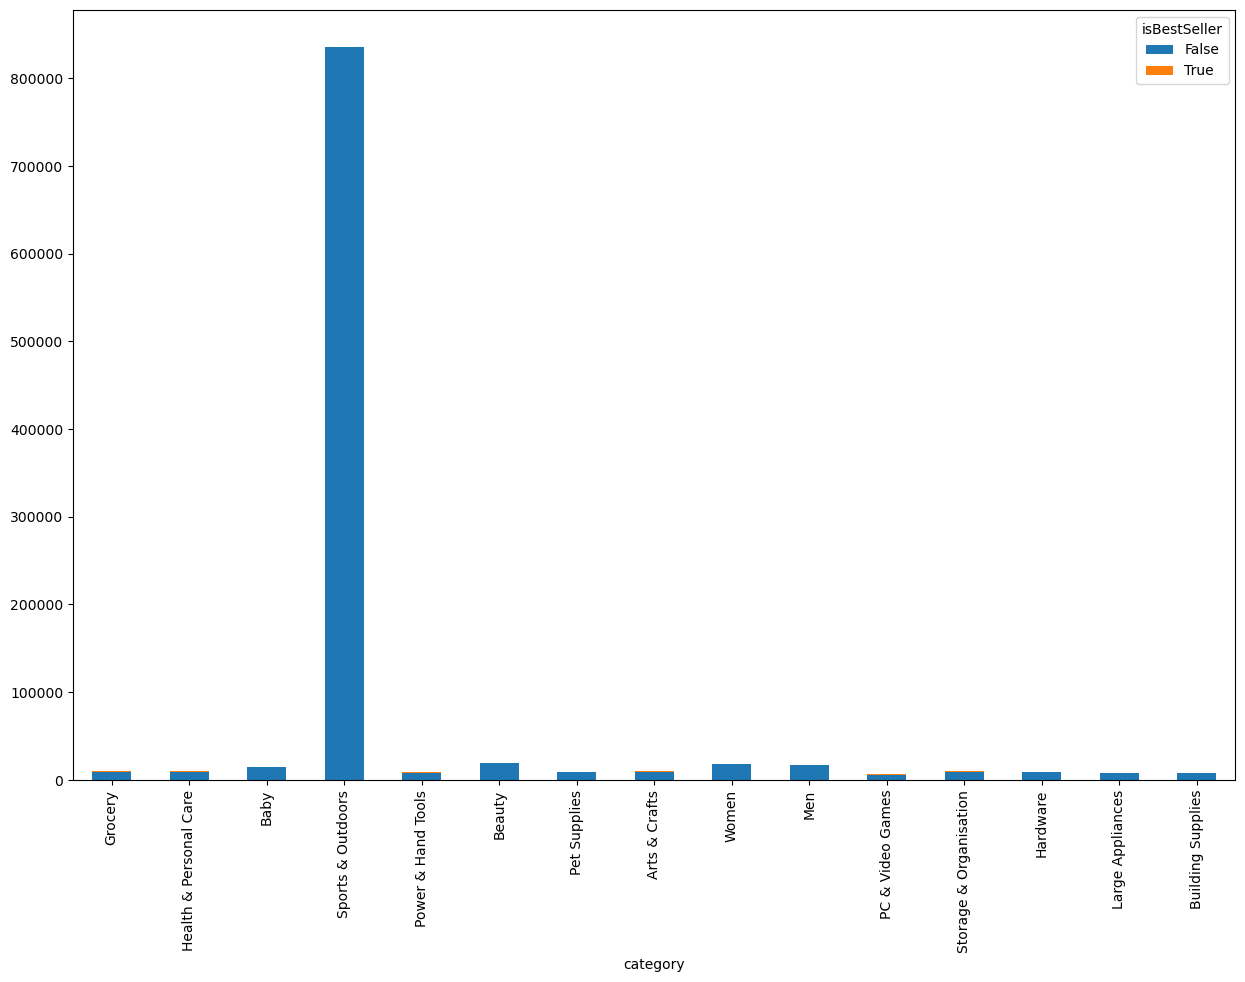

In [10]:
top_15_crosstab = crosstab1.nlargest(15, True)
top_15_crosstab.plot(kind='bar', stacked=True, figsize=(15, 10))

In [11]:
# Exploring Product Prices and Ratings Across Categories and Brands

num.head()

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [12]:
crosstab2 = pd.crosstab(cat["category"], [num["stars"], num["price"]])
crosstab2

stars                              0.0                                  \
price                          0.01    0.02    0.03    0.04    0.05      
category                                                                 
3D Printers                          0       0       0       0       0   
3D Printing & Scanning               0       0       0       0       0   
Abrasive & Finishing Products        0       0       0       0       0   
Action Cameras                       0       0       0       0       0   
Adapters                             0       0       0       0       0   
...                                ...     ...     ...     ...     ...   
Wind Instruments                     0       0       0       0       0   
Window Treatments                    0       0       0       0       0   
Women                                0       0       0       0       0   
Women's Sports & Outdoor Shoes       0       0       0       0       0   
eBook Readers & Accessories          0       0       0       0       0   

stars                                                                   ...  \
price                          0.06    0.07    0.08    0.09    0.10     ...   
category                                                                ...   
3D Printers                          0       0       0       0       0  ...   
3D Printing & Scanning               0       0       0       0       0  ...   
Abrasive & Finishing Products        0       0       0       0       0  ...   
Action Cameras                       0       0       0       0       0  ...   
Adapters                             0       0       0       0       0  ...   
...                                ...     ...     ...     ...     ...  ...   
Wind Instruments                     0       0       0       0       0  ...   
Window Treatments                    0       0       0       0       0  ...   
Women                                0       0       0       0       0  ...   
Women's Sports & Outdoor Shoes       0       0       0       0       0  ...   
eBook Readers & Accessories          0       0       0       0       0  ...   

stars                              5.0                                  \
price                          5063.00 5399.00 5659.00 6499.97 6665.26   
category                                                                 
3D Printers                          0       0       0       0       0   
3D Printing & Scanning               0       0       0       0       0   
Abrasive & Finishing Products        0       0       0       0       0   
Action Cameras                       0       0       0       0       0   
Adapters                             0       0       0       0       0   
...                                ...     ...     ...     ...     ...   
Wind Instruments                     0       0       0       0       0   
Window Treatments                    0       0       0       0       0   
Women                                0       0       0       0       0   
Women's Sports & Outdoor Shoes       0       0       0       0       0   
eBook Readers & Accessories          0       0       0       0       0   

stars                                                                   
price                          6850.00 6918.06 7001.98 8225.19 9204.40  
category                                                                
3D Printers                          0       0       0       0       0  
3D Printing & Scanning               0       0       0       0       0  
Abrasive & Finishing Products        0       0       0       0       0  
Action Cameras                       0       0       0       0       0  
Adapters                             0       0       0       0       0  
...                                ...     ...     ...     ...     ...  
Wind Instruments                     0       0       0       0       0  
Window Treatments                    0       0       0       0       0  
Women           

In [13]:
# Remove outliers in product prices
Q1 = num['price'].quantile(0.25)
Q3 = num['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
dfTukey = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


/var/folders/rp/xh3vdlq17n94q_y2mld23x5r0000gn/T/ipykernel_4193/203320071.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTukey['Top20 median category'] = dfTukey['category'].apply(lambda x: x if x in top_20_median_categories else 'Other')


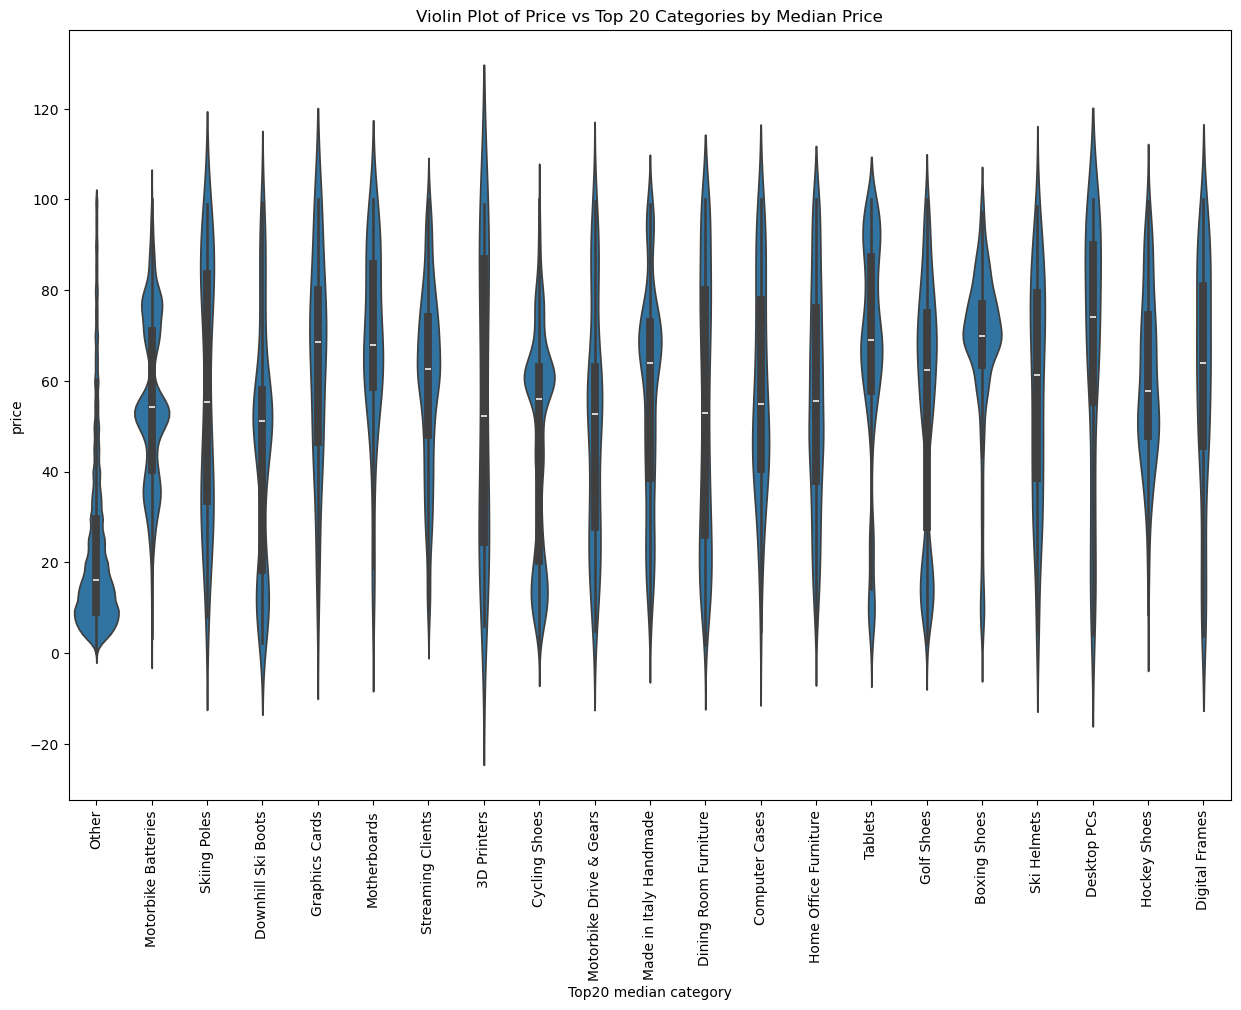

In [26]:
# Violin Plot "price" vs "Top 20 category"
# Calculate the median price for each category
# Desktop PC tends to have the highest median price?

median_prices = dfTukey.groupby('category')['price'].median()

# Get the top 20 categories with the largest median prices
top_20_median_categories = median_prices.nlargest(20).index

# Create a new column for the top 20 categories by median price
dfTukey['Top20 median category'] = dfTukey['category'].apply(lambda x: x if x in top_20_median_categories else 'Other')

# Plot the violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(x='Top20 median category', y='price', data=dfTukey)
plt.xticks(rotation=90)
plt.title('Violin Plot of Price vs Top 20 Categories by Median Price')
plt.show()


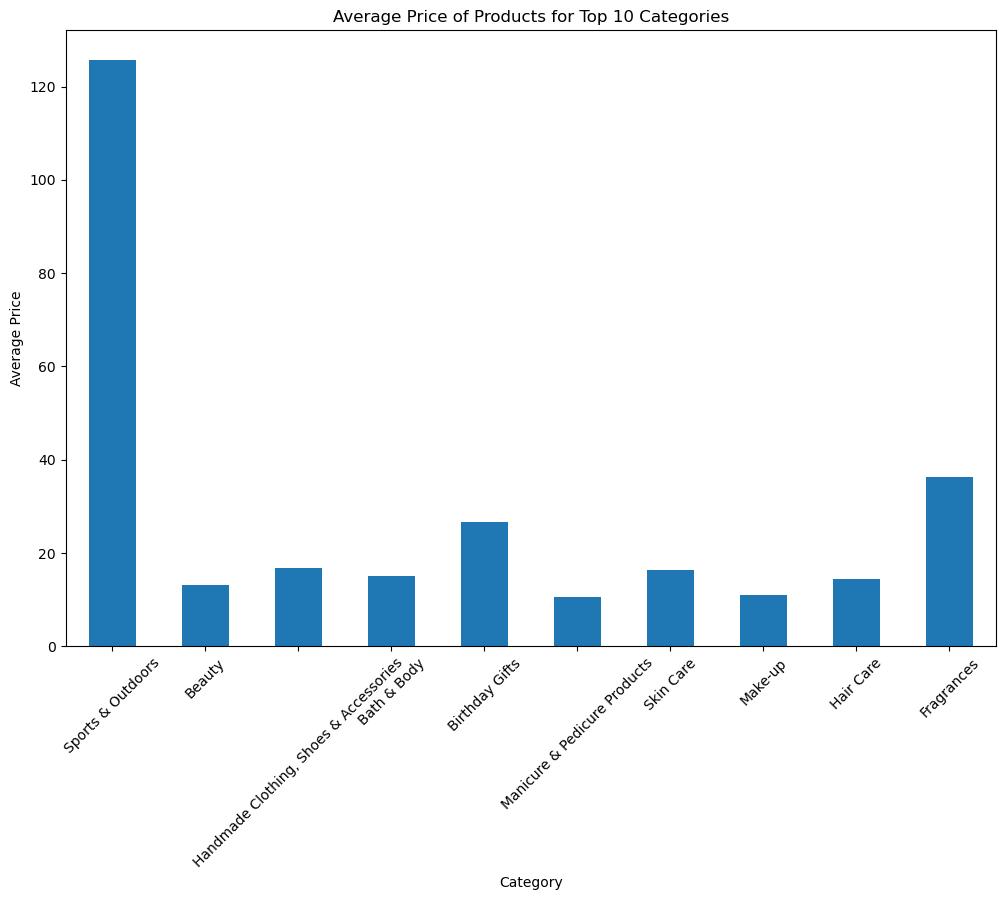

The product category with the highest average price is 'Sports & Outdoors' with an average price of 125.77.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the average price for each category
average_prices = df.groupby('category')['price'].mean()

# Get the top 10 categories based on count
top_10_categories = df['category'].value_counts().head(10).index

# Filter the average prices for the top 10 categories
top_10_average_prices = average_prices[top_10_categories]

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_10_average_prices.plot(kind='bar')
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Find the category with the highest average price
highest_avg_price_category = top_10_average_prices.idxmax()
highest_avg_price = top_10_average_prices.max()

print(f"The product category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price:.2f}.")



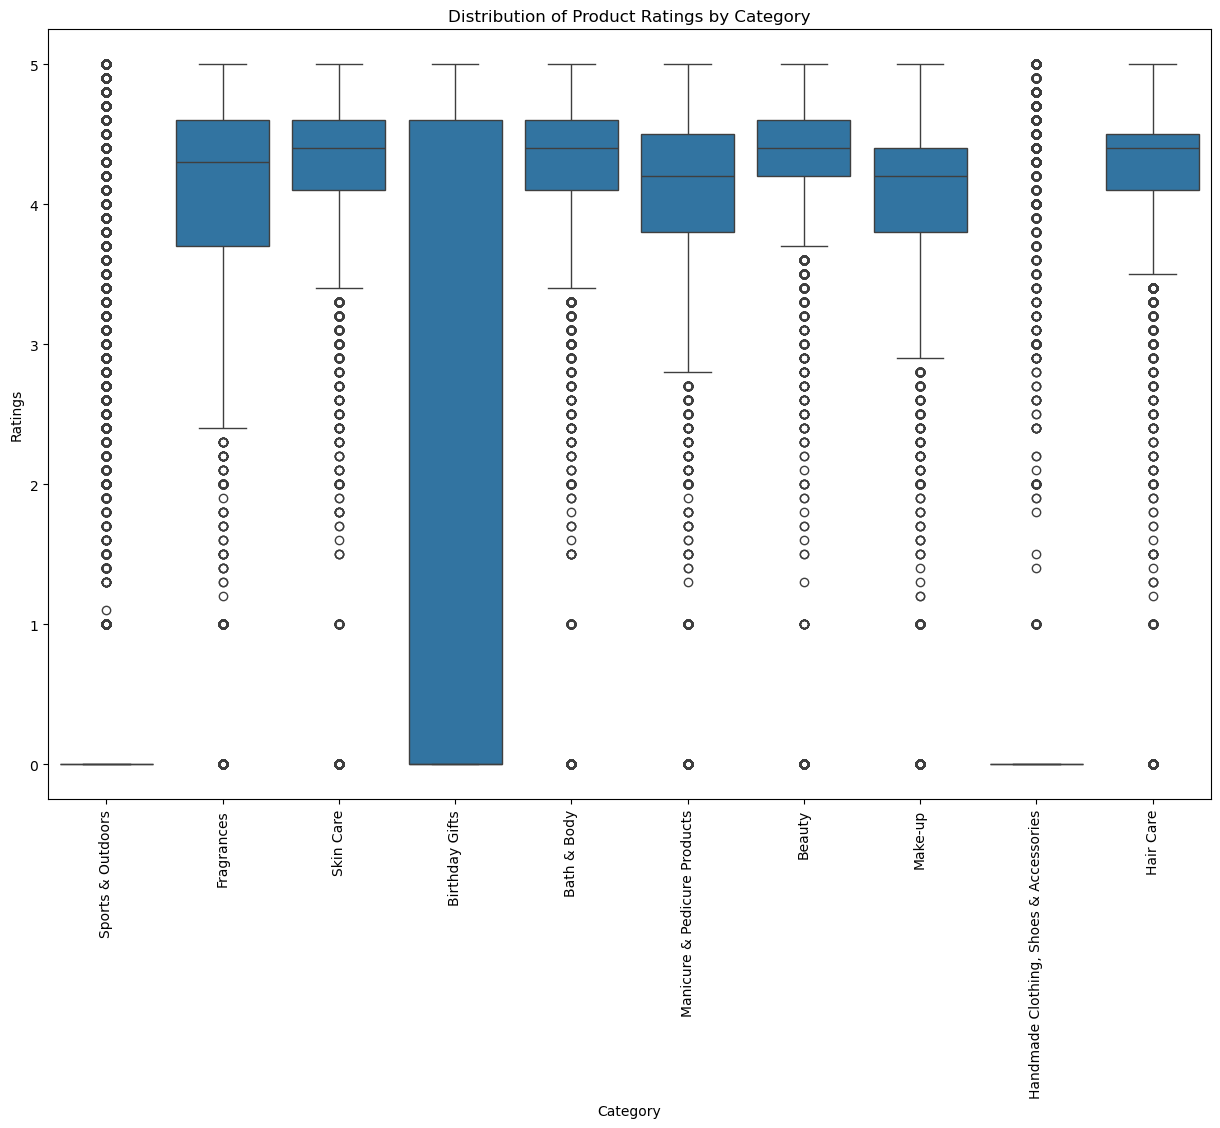

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the top 10 categories are defined
top_10_categories = df['category'].value_counts().head(10).index

# Filter the dataframe for the top 10 categories based on count
top_10_categories_df = df[df['category'].isin(top_10_categories)]

# Plot the side-by-side box plots
plt.figure(figsize=(15, 10))
sns.boxplot(x='category', y='stars', data=top_10_categories_df)
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.show()

In [32]:
crosstab3 = pd.crosstab(num["price"], num["stars"])
crosstab3 = crosstab3.sort_values(by=crosstab3.columns.tolist(), ascending=False)
crosstab3



stars,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
price,,,,,,,,,,,,,,,,,,,,,
12.99,16704,121,0,1,6,7,11,1,0,8,...,1196,1695,2149,2624,2873,2565,1641,642,183,1918
9.99,12567,202,0,1,2,2,13,2,4,4,...,2114,2806,3769,4481,4781,4221,2263,916,220,3151
14.99,11228,98,0,0,0,1,4,2,3,3,...,1155,1595,2010,2572,2770,2461,1675,789,205,2004
10.99,11122,90,0,0,0,1,6,3,0,2,...,772,1054,1410,1638,1926,1632,963,367,100,1267
8.99,10394,118,0,0,3,3,4,3,6,7,...,1353,1920,2438,2945,3030,2602,1480,683,148,2148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6918.06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7001.98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# We do not have a significant correlation between the category and the best seller status

chi2_test2 = _,chi2_pvalue,_,_ = stats.chi2_contingency(crosstab3)
float(chi2_pvalue) < 0.05  

False

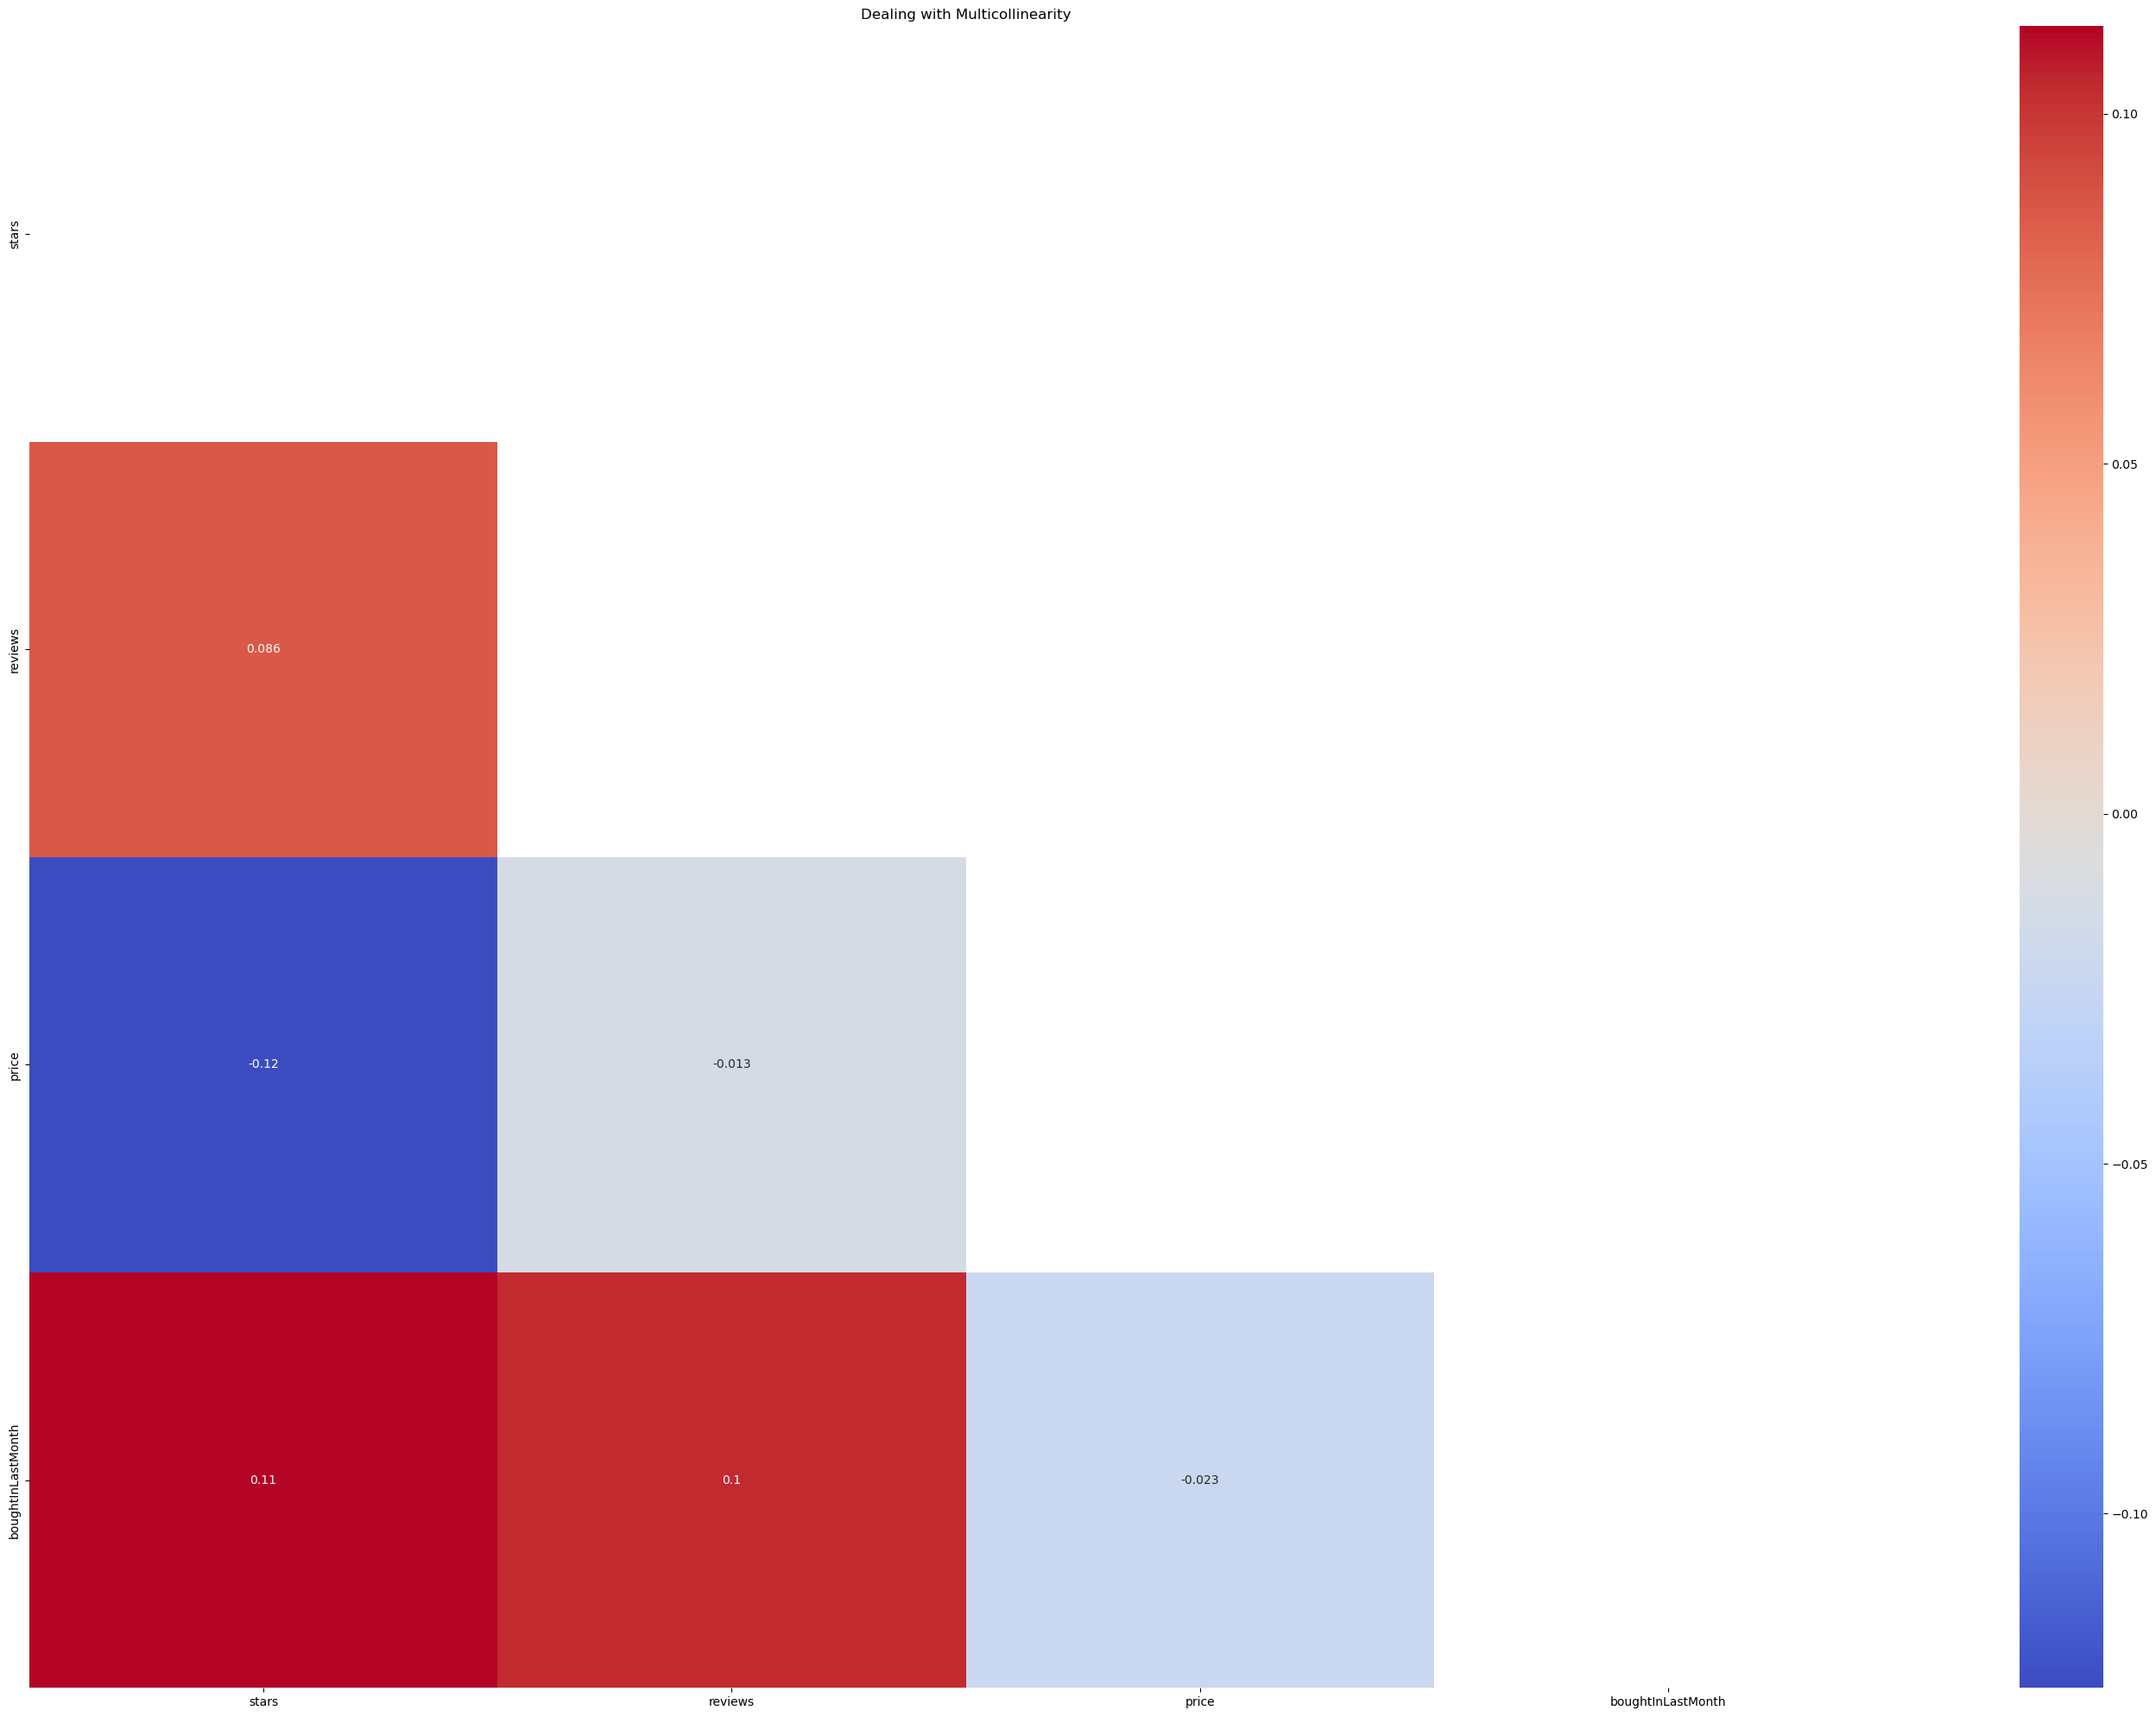

In [41]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
crosstab4 = num[["stars", "reviews", "price", "boughtInLastMonth"]]
correlation_matrix = crosstab4.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")

plt.title("Dealing with Multicollinearity")
plt.show()


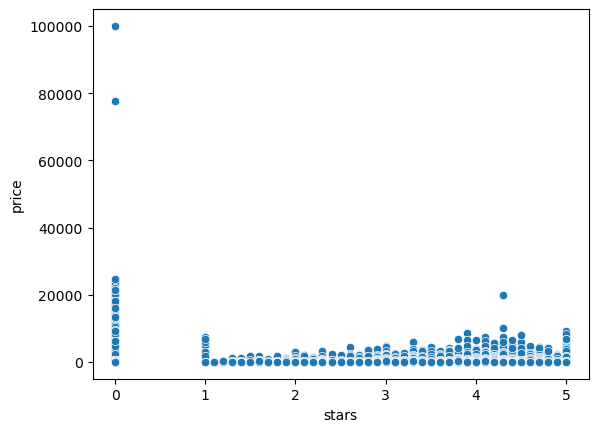

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [38]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(x=df["stars"], y=df["price"])
plt.show()
plt.figure(figsize=(12, 8))

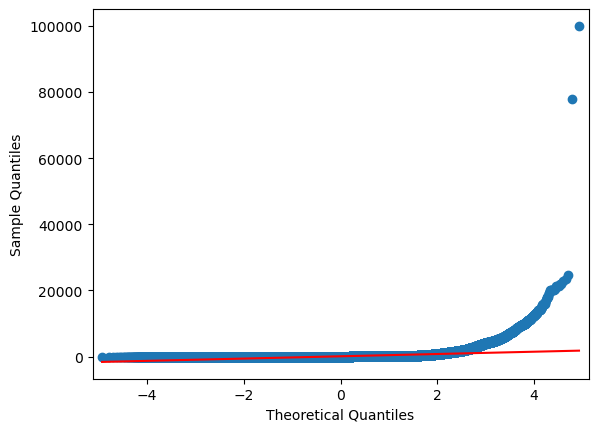

In [42]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'Product Price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()

In [ ]:
# It is monotonic but non linear distribution.